In [1]:
# Vamos começar importando as bibliotecas iniciais necessárias para realizar nosso projeto.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1 - Análise Exploratória e Estatística.

In [2]:
# Vamos começar importando nossos arquivos .csv utilizando a biblioteca pandas.

train_titanic = pd.read_csv(r"C:\Users\yamas\Downloads\titanic\train.csv")
test_titanic = pd.read_csv(r"C:\Users\yamas\Downloads\titanic\test.csv")

# Vamos verificar as 5 primeiras e as 5 últimas linhas de train_titanic.
train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Vamos verificar as 5 primeiras e as 5 últimas linhas de test_titanic.
test_titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# Analisaremos as informações sobre as colunas de train_titanic
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Analisaremos as informações sobre as colunas de test_titanic
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
# Exibir as caracteristicas estatisticas das colunas numéricas do nosso dataframe.
train_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Exibir as caracteristicas estatisticas das colunas numéricas do nosso dataframe.
test_titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# Vamos conferir quantos valores nulos existem em cada coluna de 'train_titanic'.
train_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Podemos observar que existem 3 colunas com valores nulos em 'train_titanic'.

A coluna 'Age' possui 177 valores nulos e a coluna 'Cabin' possui 687 valores nulos.

A coluna 'Embarked' também possui 2 valores nulos que deverão ser tratados.

In [9]:
# Vamos conferir quantos valores nulos existem em cada coluna de 'test_titanic'.
test_titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Existem 3 colunas com valores nulos em 'test_titanic'.

A coluna 'Age' possui 86 valores nulos e a coluna 'Cabin' possui 327 valores nulos.

A coluna 'Fare' também possui 1 valor nulo que deverá ser tratado.

Agora vamos plotar algumas figuras para obter alguns insights sobre nossos dados.

Vamos utilizar apenas o conjunto "train_data", pois esse é o conjunto que possui a variável "Survived", indicando se o indivíduo sobreviveu ou não ao desastre.

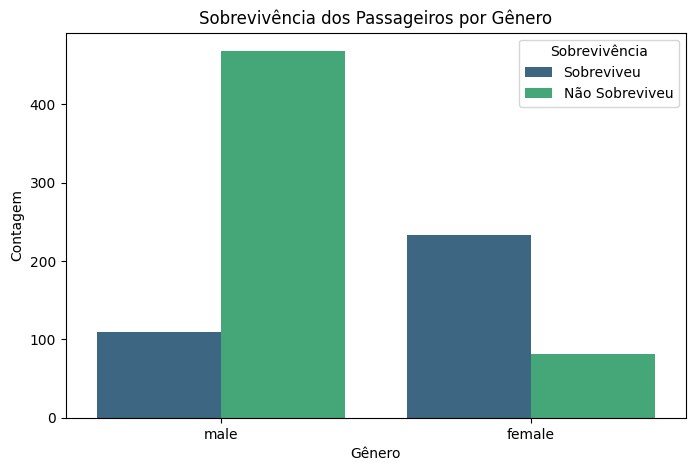

In [10]:
# Criar gráfico de barras empilhadas para visualizar sobrevivencia dos passageiros por genero
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=train_titanic, palette='viridis', hue_order=[1, 0])
plt.title('Sobrevivência dos Passageiros por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Sobrevivência', labels=['Sobreviveu', 'Não Sobreviveu'])
plt.show()

Haviam mais homens do que mulheres no Titanic.

A maioria dos homens não sobreviveram, enquanto a maioria das mulheres conseguiram sair com vida do acidente.

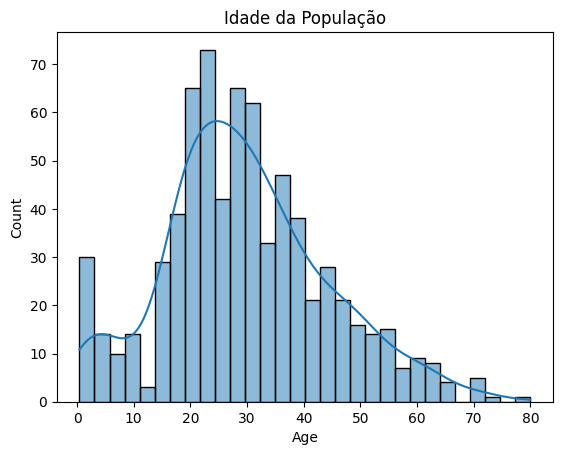

In [11]:
# Use gráficos para visualizar distribuições de variáveis numéricas, como idade.
sns.histplot(train_titanic['Age'].dropna(), bins=30, kde=True)
plt.title('Idade da População')
plt.show()

Pessoas de todas as idade estavam presentes no navio, desde bebês até idosos.

A maior parte da população do navio estava na faixa etária entre 20 e 40 anos de idade.

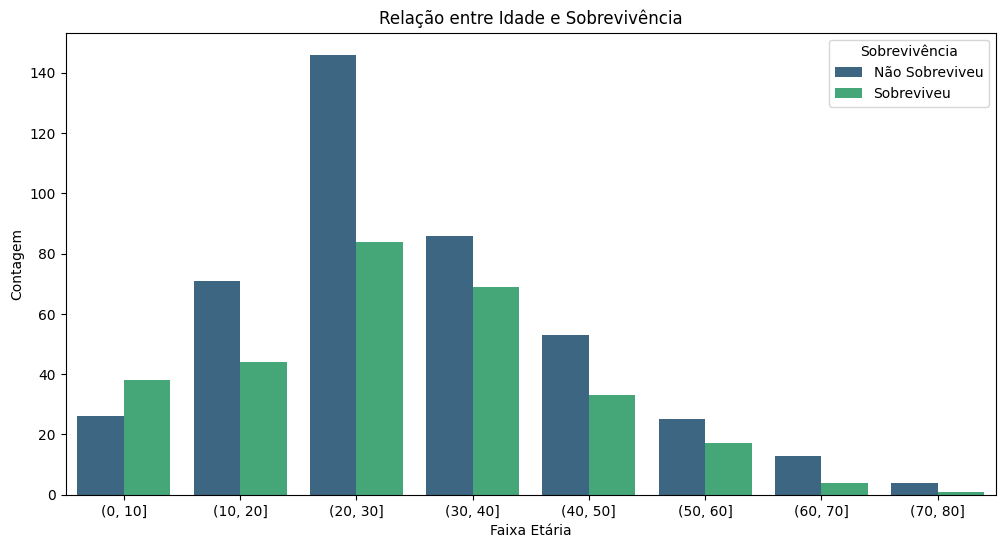

In [12]:
# Relação entre sobrevivencia e idade

# Definir a faixa etária (você pode ajustar isso conforme necessário)
faixa_etaria = pd.cut(train_titanic['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x=faixa_etaria, hue='Survived', data=train_titanic, palette='viridis')
plt.title('Relação entre Idade e Sobrevivência')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.legend(title='Sobrevivência', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.show()

A única faixa etária que teve mais sobreviventes do que óbitos foi entre 0 e 10 anos de idade.

Provavelmente também por conta da política de salvamento de mulheres e crianças primeiro.

Infelizmente, o mesmo não aconteceu com as outras faixas de idade.

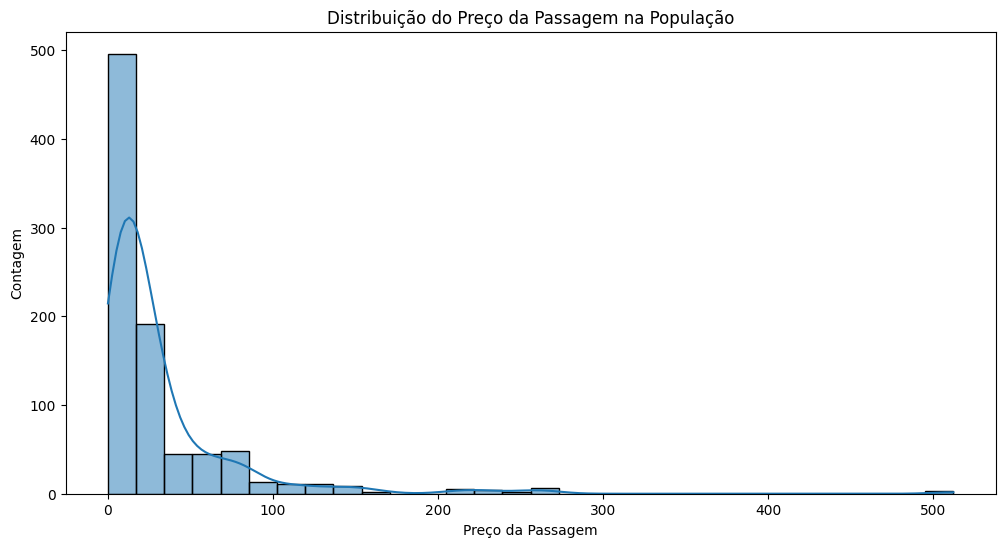

In [13]:
# Criar histograma pra visualizar distribuição de idade da população
plt.figure(figsize=(12, 6))
sns.histplot(train_titanic['Fare'], bins=30, kde=True)
plt.title('Distribuição do Preço da Passagem na População')
plt.xlabel('Preço da Passagem')
plt.ylabel('Contagem')
plt.show()

Como podemos observar no gráfico acima a maior parte da populão havia comprado as passagens mais baratas do navio.

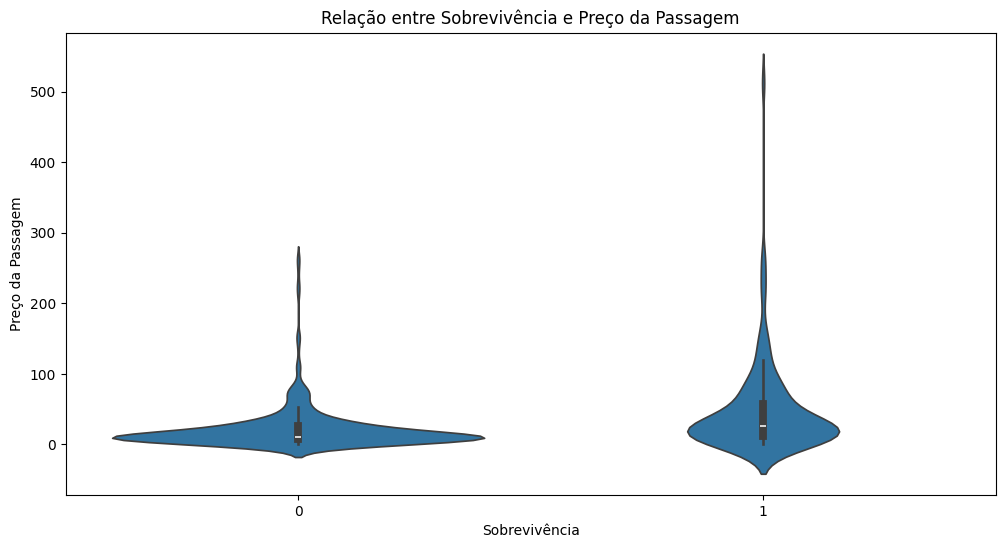

In [14]:
# Criar gráfico de violino
plt.figure(figsize=(12, 6))
sns.violinplot(x='Survived', y='Fare', data=train_titanic)
plt.title('Relação entre Sobrevivência e Preço da Passagem')
plt.xlabel('Sobrevivência')
plt.ylabel('Preço da Passagem')
plt.show()

O número '0' indica os não sobreviventes e '1' indica os sobreviventes do navio.

O gráfico de violino nos mostra que a maioria dos não sobreviventes haviam comprado as passagens mais baratas do navio.

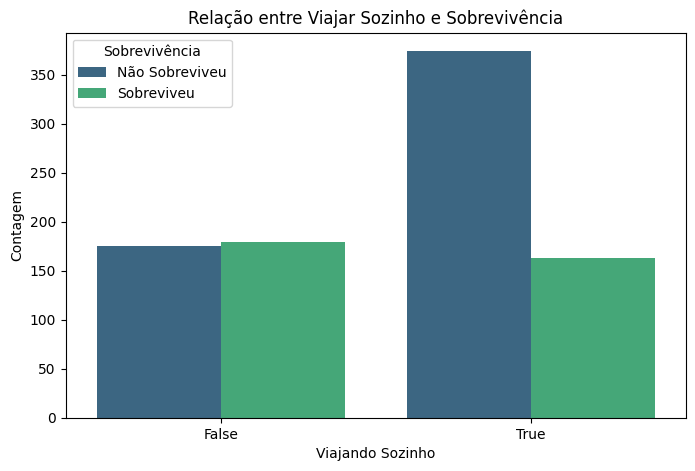

In [15]:
#Podemos criar uma nova coluna chamada 'Alone' que indica se o passageiro estava viajando sozinho com base nas colunas 
#'SibSp' (número de irmãos/cônjuges a bordo) e 'Parch' (número de pais/filhos a bordo).

# Criação da feature 'Alone'
train_titanic['Alone'] = (train_titanic['SibSp'] == 0) & (train_titanic['Parch'] == 0)

# Visualize a relação entre viajar sozinho e sobrevivência
plt.figure(figsize=(8, 5))
sns.countplot(x='Alone', hue='Survived', data=train_titanic, palette='viridis')
plt.title('Relação entre Viajar Sozinho e Sobrevivência')
plt.xlabel('Viajando Sozinho')
plt.ylabel('Contagem')
plt.legend(title='Sobrevivência', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.show()

Haviam mais pessoas a bordo viajando sozinho do que acompanhado.

A maioria dos indivíduos que estavam viajando sozinhos sobreviveram ao desastre.

In [16]:
# Extração do título do passageiro
train_titanic['Title'] = train_titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Verifique os títulos únicos e suas contagens
print(train_titanic['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


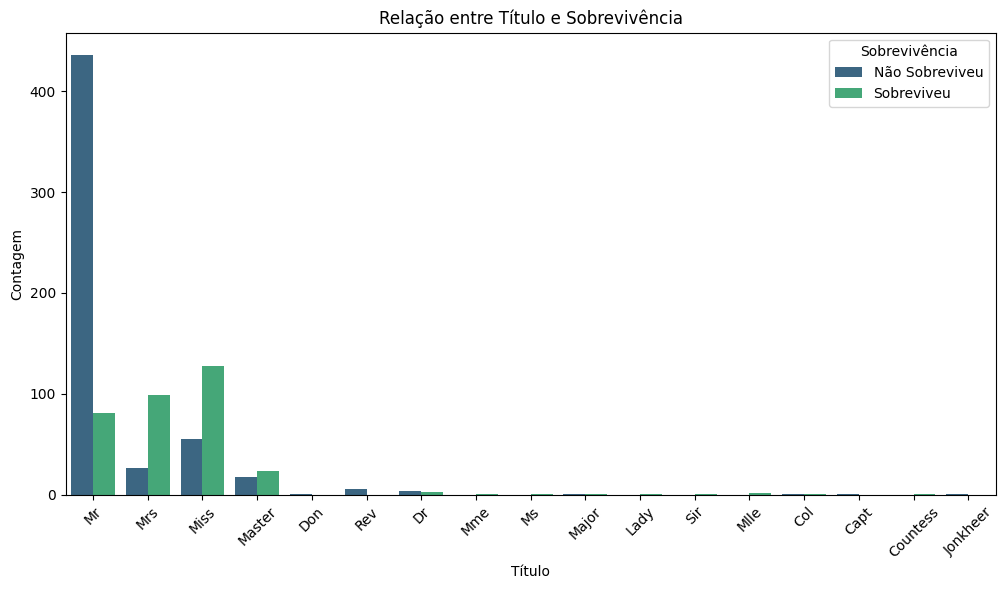

In [17]:
# A ideia é extrair o título (Mr., Mrs., etc.) de cada nome e criar uma nova feature com essa informação. Vamos fazer isso:
# Visualize a relação entre o título e a sobrevivência
plt.figure(figsize=(12, 6))
sns.countplot(x='Title', hue='Survived', data=train_titanic, palette='viridis')
plt.title('Relação entre Título e Sobrevivência')
plt.xlabel('Título')
plt.ylabel('Contagem')
plt.legend(title='Sobrevivência', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.xticks(rotation=45)
plt.show()

Títulos como "Master" e "Dr", provavelmente por representar pessoas mais influentes, tiveram uma taxa de sobrevivência maior. 

Títulos femininos como "Mrs" e "Miss", como esperado de acordo com as análises anteriores, tiveram boas taxas de sobrevivência também.



# 2 - Tratamento de Dados

Vamos começar a etapa de tratamento de dados eliminando as colunas que não contribuem para o nosso projeto.

In [18]:
# Excluir as colunas 'Name' e 'Ticket'
train_titanic.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Verificar as primeiras linhas do conjunto de dados após a exclusão
print(train_titanic.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0            1         0       3    male  22.0      1      0   7.2500   NaN   
1            2         1       1  female  38.0      1      0  71.2833   C85   
2            3         1       3  female  26.0      0      0   7.9250   NaN   
3            4         1       1  female  35.0      1      0  53.1000  C123   
4            5         0       3    male  35.0      0      0   8.0500   NaN   

  Embarked  Alone Title  
0        S  False    Mr  
1        C  False   Mrs  
2        S   True  Miss  
3        S  False   Mrs  
4        S   True    Mr  


Vamos lidar com os valores vazios que pudemos observar na etapa anterior.

In [19]:
#Lidando com os valores vazios de train_titanic

#Em idade utilizaremos a média de idade da população
mean_age = train_titanic['Age'].mean()
train_titanic['Age'].fillna(mean_age, inplace=True)

#Em cabin vamos excluir a coluna pois a maioria dos valores está ausente
train_titanic.drop('Cabin', axis=1, inplace=True)

#Em embarked colocaremos o valor mais comum
most_common_embarked = train_titanic['Embarked'].mode()[0]
train_titanic['Embarked'].fillna(most_common_embarked, inplace=True)

In [20]:
#Lidando com os valores vazios de test_titanic

#Em idade utilizaremos a média de idade da população
mean_age_test = test_titanic['Age'].mean()
test_titanic['Age'].fillna(mean_age_test, inplace=True)

#Preencher o valor ausente em "Fare" com a mediana da coluna.
median_fare_test = test_titanic['Fare'].median()
test_titanic['Fare'].fillna(median_fare_test, inplace=True)

#Como a maioria dos valores em "Cabin" estiver ausente, pode ser apropriado remover a coluna.
test_titanic.drop('Cabin', axis=1, inplace=True)

Criar uma matriz de correlação nos ajuda a observar quais são as categorias mais "importantes" do nosso dataframe.

Me refiro as categorias que possuem um valor de correlação maior(mais próximo de 1 ou -1) em relação a nossa variável alvo.

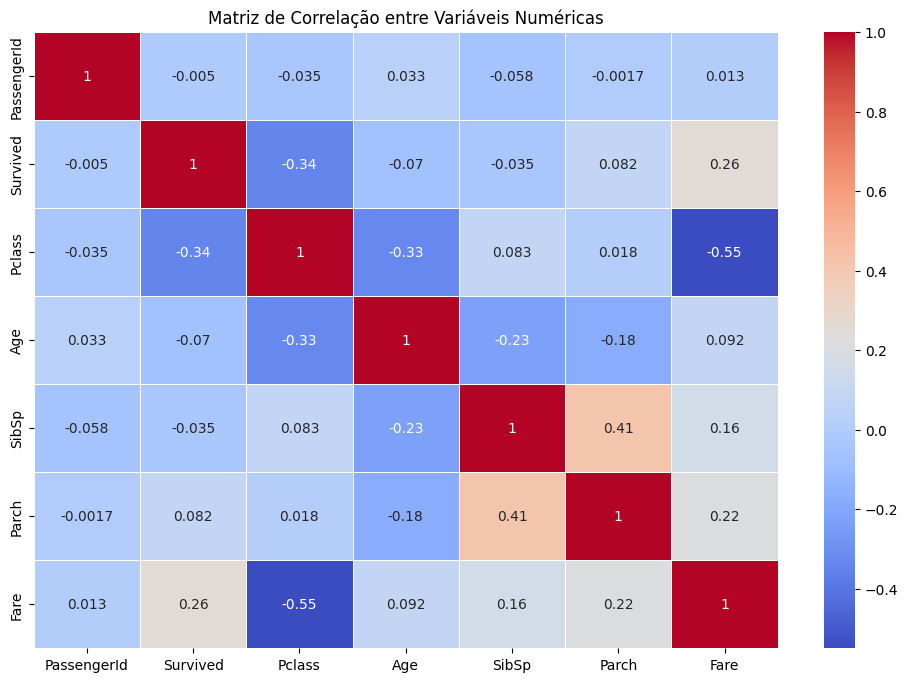

In [21]:
# Separar colunas não numéricas antes de calcular a matriz de correlação
numeric_columns = train_titanic.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_titanic[numeric_columns].corr()

# Criar um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

"Fare" e "Pclass" são as variáveis com mais correlação com "Survived".

In [22]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Alone        891 non-null    bool   
 10  Title        891 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 70.6+ KB


Aplicar One Hot Encoding nas variáveis não numéricas é essencial para o nosso projeto.

Esse processo torna cada tipo de entrada de determinada coluna, em uma coluna nova.

Essas colunas novas possuem valores booleanos de True ou False.

Isso torna possível para algoritmos de Machine Learning aprender com dados não numéricos também.

In [23]:
# Aplicar one-hot encoding para 'Sex' e 'Embarked'
train_titanic = pd.get_dummies(train_titanic, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Visualizar as primeiras linhas do conjunto de dados após a codificação
print(train_titanic.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Alone  \
0            1         0       3  22.0      1      0   7.2500  False   
1            2         1       1  38.0      1      0  71.2833  False   
2            3         1       3  26.0      0      0   7.9250   True   
3            4         1       1  35.0      1      0  53.1000  False   
4            5         0       3  35.0      0      0   8.0500   True   

   Sex_male  Embarked_Q  ...  Title_Major  Title_Master  Title_Miss  \
0      True       False  ...        False         False       False   
1     False       False  ...        False         False       False   
2     False       False  ...        False         False        True   
3     False       False  ...        False         False       False   
4      True       False  ...        False         False       False   

   Title_Mlle  Title_Mme  Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Title_Sir  
0       False      False      True      False     False     

In [24]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Alone           891 non-null    bool   
 8   Sex_male        891 non-null    bool   
 9   Embarked_Q      891 non-null    bool   
 10  Embarked_S      891 non-null    bool   
 11  Title_Col       891 non-null    bool   
 12  Title_Countess  891 non-null    bool   
 13  Title_Don       891 non-null    bool   
 14  Title_Dr        891 non-null    bool   
 15  Title_Jonkheer  891 non-null    bool   
 16  Title_Lady      891 non-null    bool   
 17  Title_Major     891 non-null    boo

Realizar os mesmos procedimentos que fizemos no conjunto de treino, no conjunto de teste.

In [25]:
# Realizar no conjunto de teste o mesmo tratamento de dados que foi feito no conjunto de treino.

# Lidar com valores vazios de 'Age'
test_titanic['Age'].fillna(mean_age, inplace=True)

# Lidar com valores vazios de 'Embarked'
test_titanic['Embarked'].fillna(most_common_embarked, inplace=True)

# Criar a coluna 'Alone'
test_titanic['Alone'] = (test_titanic['SibSp'] == 0) & (test_titanic['Parch'] == 0)

# Criar a coluna 'Title'
test_titanic['Title'] = test_titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Aplicar one-hot encoding para 'Sex' e 'Embarked'
test_titanic = pd.get_dummies(test_titanic, columns=['Sex', 'Embarked'], drop_first=True)

# Aplicar one-hot encoding para 'Title'
test_titanic = pd.get_dummies(test_titanic, columns=['Title'], drop_first=True)

# Excluir as colunas 'Name' e 'Ticket'
test_titanic.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Verificar as primeiras linhas do conjunto de dados após o pré-processamento
print(test_titanic.head())

   PassengerId  Pclass   Age  SibSp  Parch     Fare  Alone  Sex_male  \
0          892       3  34.5      0      0   7.8292   True      True   
1          893       3  47.0      1      0   7.0000  False     False   
2          894       2  62.0      0      0   9.6875   True      True   
3          895       3  27.0      0      0   8.6625   True      True   
4          896       3  22.0      1      1  12.2875  False     False   

   Embarked_Q  Embarked_S  Title_Dona  Title_Dr  Title_Master  Title_Miss  \
0        True       False       False     False         False       False   
1       False        True       False     False         False       False   
2        True       False       False     False         False       False   
3       False        True       False     False         False       False   
4       False        True       False     False         False       False   

   Title_Mr  Title_Mrs  Title_Ms  Title_Rev  
0      True      False     False      False  
1     False 

In [26]:
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Age           418 non-null    float64
 3   SibSp         418 non-null    int64  
 4   Parch         418 non-null    int64  
 5   Fare          418 non-null    float64
 6   Alone         418 non-null    bool   
 7   Sex_male      418 non-null    bool   
 8   Embarked_Q    418 non-null    bool   
 9   Embarked_S    418 non-null    bool   
 10  Title_Dona    418 non-null    bool   
 11  Title_Dr      418 non-null    bool   
 12  Title_Master  418 non-null    bool   
 13  Title_Miss    418 non-null    bool   
 14  Title_Mr      418 non-null    bool   
 15  Title_Mrs     418 non-null    bool   
 16  Title_Ms      418 non-null    bool   
 17  Title_Rev     418 non-null    bool   
dtypes: bool(12), float64(2), int64

# 3 - Construção e Teste de Modelos de Machine Learning

Nessa etapa vamos separar nossos dados (train_titanic) em um conjunto de treino e um conjunto de teste. 

Na sequência iremos construir diversos modelos de classificação, e logo depois os usaremos para tentar prever quais indivíduos sobreviveram a tragédia.

In [27]:
from sklearn.preprocessing import StandardScaler

# Separar as features (X) e o alvo (y) no conjunto de treinamento
X_train = train_titanic.drop('Survived', axis=1)
y_train = train_titanic['Survived']

# Dividir os dados em conjuntos de treinamento e teste
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Criar Standard Scaler para utilizar em SVM e KNN (modelos sensíveis a escala dos dados)
svm_scaler = StandardScaler()
X_train_svm = svm_scaler.fit_transform(X_train_split)
X_test_svm = svm_scaler.transform(X_test_split)

knn_scaler = StandardScaler()
X_train_knn = knn_scaler.fit_transform(X_train_split)
X_test_knn = knn_scaler.transform(X_test_split)

Aplicar Regressão Logística nos conjuntos de treinamento separados.

In [28]:
from sklearn.linear_model import LogisticRegression
import numpy as np

C_values = np.logspace(-3, 3, 7)  # Valores de C em uma escala logarítmica
# Exploração em uma grade logarítmica: Tentar valores em uma escala logarítmica, o que é comum para hiperparâmetros de regularização. 
# Por exemplo, 0.001, 0.01, 0.1, 1, 10, 100, etc.
for C in C_values:
    model = LogisticRegression(C=C, max_iter=2500, random_state=42)
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_test_split)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calcular e imprimir métricas de avaliação como acurácia, precisão, recall, F1-score e a matriz de confusão.

accuracy_logistic = accuracy_score(y_test_split, y_pred)
print("Acurácia:", accuracy_logistic)
print("Relatório de Classificação:\n", classification_report(y_test_split, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test_split, y_pred))

Acurácia: 0.8212290502793296
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Matriz de Confusão:
 [[91 14]
 [18 56]]


O modelo parece ter um bom desempenho, com uma acurácia de 81%.
A precisão e o recall para ambas as classes (0 e 1) são razoavelmente equilibrados.
A matriz de confusão mostra um número razoável de verdadeiros positivos e verdadeiros negativos, indicando que o modelo está fazendo previsões corretas em ambas as classes.

Aplicar Random Forest nos conjuntos de treinamento separados.

In [30]:
from sklearn.ensemble import RandomForestClassifier

# É um modelo de ensemble que combina várias árvores de decisão para melhorar o desempenho e reduzir o overfitting.
model_rf = RandomForestClassifier(n_estimators=200,  max_depth=20, random_state=42)
model_rf.fit(X_train_split, y_train_split)
y_pred_rf = model_rf.predict(X_test_split)

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calcular e imprimir métricas de avaliação
accuracy_rf = accuracy_score(y_test_split, y_pred_rf)
print("Acurácia:", accuracy_rf)
print("Relatório de Classificação:\n", classification_report(y_test_split, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test_split, y_pred_rf))

Acurácia: 0.8547486033519553
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       105
           1       0.83      0.81      0.82        74

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179

Matriz de Confusão:
 [[93 12]
 [14 60]]


Aplicar SVM (Support Vector Machine) nos conjuntos de treinamento separados.

In [32]:
from sklearn.svm import SVC

#É um modelo que tenta encontrar um hiperplano de separação ótimo entre as classes.
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train_svm, y_train_split)
# Faça previsões e avalie os modelos
svm_predictions = model_svm.predict(X_test_svm)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calcular e imprimir métricas de avaliação
accuracy_svm = accuracy_score(y_test_split, svm_predictions)
print("Acurácia:", accuracy_svm )
print("Relatório de Classificação:\n", classification_report(y_test_split, svm_predictions))
print("Matriz de Confusão:\n", confusion_matrix(y_test_split, svm_predictions))

Acurácia: 0.8156424581005587
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

Matriz de Confusão:
 [[90 15]
 [18 56]]


Aplicar Gradient Boosting nos conjuntos de treinamento separados.

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# É um modelo de ensemble que constrói árvores sequencialmente, cada uma corrigindo os erros do modelo anterior.
model_gb = GradientBoostingClassifier(max_depth=5, random_state=42)
model_gb.fit(X_train_split, y_train_split)
y_pred_gb = model_gb.predict(X_test_split)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calcular e imprimir métricas de avaliação do modelo Gradient Boosting
accuracy_gb = accuracy_score(y_test_split, y_pred_gb)
print("Acurácia:", accuracy_gb )
print("Relatório de Classificação:\n", classification_report(y_test_split, y_pred_gb))
print("Matriz de Confusão:\n", confusion_matrix(y_test_split, y_pred_gb))

Acurácia: 0.8491620111731844
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       105
           1       0.83      0.80      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

Matriz de Confusão:
 [[93 12]
 [15 59]]


Aplicar KNN (K-Nearest Neighbors) nos conjuntos de treinamento separados.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Classifica os dados com base na maioria dos votos dos k vizinhos mais próximos.
model_knn = KNeighborsClassifier(metric='manhattan')
model_knn.fit(X_train_knn, y_train_split)
knn_predictions = model_knn.predict(X_test_knn)


In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calcular e imprimir métricas de avaliação do modelo KNN
accuracy_knn = accuracy_score(y_test_split, knn_predictions)
print("Acurácia:", accuracy_knn)
print("Relatório de Classificação:\n", classification_report(y_test_split, knn_predictions))
print("Matriz de Confusão:\n", confusion_matrix(y_test_split, knn_predictions))

Acurácia: 0.8435754189944135
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.85      0.76      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179

Matriz de Confusão:
 [[95 10]
 [18 56]]


Aplicar Redes Neurais (Neural Networks) nos conjuntos de treinamento separados.

In [38]:
from sklearn.neural_network import MLPClassifier

# Modelos de aprendizado profundo que podem aprender padrões complexos.
model_nn = MLPClassifier(random_state=42)
model_nn.fit(X_train_split, y_train_split)
y_pred_nn = model_nn.predict(X_test_split)

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calcular e imprimir métricas de avaliação do modelo Neural Networks
accuracy_nn = accuracy_score(y_test_split, y_pred_nn)
print("Acurácia:", accuracy_nn)
print("Relatório de Classificação:\n", classification_report(y_test_split, y_pred_nn))
print("Matriz de Confusão:\n", confusion_matrix(y_test_split, y_pred_nn))

Acurácia: 0.8100558659217877
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85       105
           1       0.87      0.64      0.73        74

    accuracy                           0.81       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.81      0.80       179

Matriz de Confusão:
 [[98  7]
 [27 47]]


# 4 - Conclusão

Finalmente, vamos gerar um gráfico de barras para comparar a precisão das previsões de cada modelo utilizado.

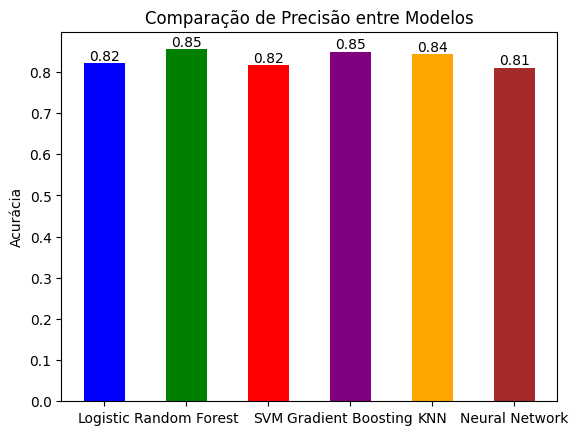

In [40]:
# Criar um gráfico de barras para comparar acurácias
import matplotlib.pyplot as plt

models = ['Logistic', 'Random Forest', 'SVM', 'Gradient Boosting', 'KNN', 'Neural Network']
accuracies = [accuracy_logistic, accuracy_rf, accuracy_svm, accuracy_gb, accuracy_knn, accuracy_nn]

# Criar o gráfico de barras
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'], width=0.5)

# Adicionar rótulos com os valores dentro das barras
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.2f}', color='black', ha='center', va='bottom')

plt.ylabel('Acurácia')
plt.title('Comparação de Precisão entre Modelos')
plt.show()

Todos os modelos tiveram desempenho entre 81% e 85%.

Os modelos que se saíram melhor foram o de Random Forest e Gradient Boosting.

É importante também analisar a matriz de confusão, para selecionar o modelo que melhor atende suas necessidades (talvez não seja simplesmente o que possui a maior acurácia). 